In [1]:
# Librerías para manejo de datos
import pandas as pd
pd.set_option('display.max_columns', 25) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar
import numpy as np
np.random.seed(3301)
import pandas as pd
# Para preparar los datos
from sklearn.preprocessing import LabelEncoder
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold 
#Librerías para la visualización
import matplotlib as mplt
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns 
from sklearn import tree
# Para la serialización del modelo
import pickle
from sklearn import preprocessing
import re
pd.options.mode.chained_assignment = None  # default='warn'


In [2]:
sns.__version__
mplt.__version__

'3.5.1'

In [3]:
# Carga de datos
db_location = "202220_Laboratorio_1_data_heart_disease_data.csv"
df_responses=pd.read_csv(db_location, sep=',', encoding = 'utf-8', index_col=0)

# ENTENDIMIENTO DE LOS DATOS

El objetivo de SaludAlpes es agilizar el proceso de detección de posibles casos de enfermedades cardiovasculares; para lo cual nosotros vamos a construir el mejor modelo de predicción posible para saber si una persona es susceptible o no a tener una enfermedad cardiovascular. Para esto, SaludAlpes nos provee los resultados de una encuesta hecha por adultos mayores de 50 años, donde cada registro representa la información de cada adulto que contestó la encuesta; a continuación, haremos un perfilamiento de los datos, evaluaremos la calidad de estos y crearemos un tablero de control, de manera que se pueda decidir qué tareas de transformación de los datos serán necesarios para que sean más útiles para el objetivo de SaludAlpes.
Después de estudiar el glosario de los datos provistos por SaludAlpes, encontramos 3 categorías en las que las columnas pueden ser agrupadas:

- Datos personales: BMI, Sex, AgeCategory, Race 
- Hábitos: Smoking, AlcoholDrinking, PhysicalActivity, SleepTime
- Historial clínico: HeartDisease, Stroke, PhysicalHealth, MentalHealth, DiffWalking, Diabetic, GenHealth, Asthma, KidneyDisease, SkinCancer

Es evidente que hay más datos de historial clínico, sin embargo, los datos de hábitos están estrictamente relacionados con la salud y los datos personales pueden permitir encontrar patrones que en principio pueden no parecer útiles, sin embargo, se ha visto que en muchos casos pertenecer a una raza en especifico o estar entre cierto rango de edades, aumenta la posibilidad de desarrollar alguna enfermedad en particular. 


## Descripcion de los datos

In [4]:
# Cantidad de datos y número de variables
df_responses.shape

(67500, 18)

In [5]:
# Imprimimos los diferentes tipos de las columnas
df_responses.dtypes

BMI                  object
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth       object
MentalHealth         object
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
HeartDisease         object
dtype: object

Tenemos un total de 67.500 registros, con 18 columnas generalmente categóricas (de respuesta sí o no) y algunas otras numéricas. No obstante, en la fuente los valores numéricos vienen como cadenas de caracteres.

In [6]:
df_responses.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
Index,,,,,,,,,,,,,,,,,,
0,26.5,No,No,No,0.0,0.0,No,Male,64-60,White,No,Yes,Very good,8.0,No,No,No,No
1,28.75,ýNoÚ,No,No,0.0,2.0,No,Male,59-55,White,No,Yes,Very good,7.0,No,No,No,No
2,19.9,Yes,No,No,0.0,1.0,No,Male,39-35,White,No,Yes,Good,7.0,No,No,No,No
3,28.06,No,No,No,1.0,1.0,No,Female,69-65,White,Yes,Yes,Good,8.0,No,No,No,£NoÇ
4,29.29,Yes,No,No,0.0,1.0,No,Female,74-70,White,No,Yes,Very good,7.0,Yes,No,No,No


In [7]:
df_responses.tail()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
Index,,,,,,,,,,,,,,,,,,
67495,26.97,No,No,No,14.0,14.0,No,NaN,74-70,White,No,Yes,Fair,8.0,No,No,Yes,No
67496,243.60000000000002,Yes,No,No,30.0,0.0,No,Female,79-75,White,No,No,Fair,7.0,No,No,No,ïNo├
67497,27.44,No,No,No,0.0,2.0,Yes,Female,64-60,White,No,No,Good,7.0,No,No,No,No
67498,18.88,Yes,Yes,No,14.0,2.0,No,Female,69-65,White,No,Yes,Fair,8.0,No,No,No,NaN
67499,24.94,ýNoØ,No,No,0.0,0.0,No,Female,34-30,Other,No,Yes,Very good,8.0,No,No,No,No


## Calidad de los datos

### Completitud:

In [8]:
# Ver el porcentaje de atributos vacios
df_porcentajes = (100*df_responses.isna().sum()/len(df_responses)).to_frame()
df_porcentajes.sort_values(0, ascending = False)

,0
HeartDisease,8.334815
Diabetic,2.472593
Race,2.423704
Smoking,2.402963
GenHealth,2.400000
Sex,2.385185
Stroke,2.379259
BMI,1.965926
PhysicalHealth,0.000000
MentalHealth,0.000000


Vemos entonces que hay 7 columnas que presentan valores nulos en algunos de los registros de los datos.

### Unicidad:

Aunque no existe alguna columna que diferencie los registros entre sí, tener registros duplicados debe corresponder a un error, dada la poca probabilidad de que 2 personas tengan los mismos datos personales, hábitos e historial clínico.

In [9]:
df_responses.duplicated().sum()

330

Vemos entonces que hay 330 registros duplicados en los datos.

### Consistencia:

In [10]:
df_responses['HeartDisease'].value_counts()

No       51361
Yes       4855
├No├       366
ïNo£       356
ÇNoÇ       346
├NoÇ       344
├Noï       338
£NoÇ       331
ïNoï       328
ÇNoï       326
£No£       325
ïNoÇ       313
ÇNo├       313
£Noï       308
├No£       307
ïNo├       298
£No├       296
ÇNo£       291
ïYesÇ       37
ÇYes├       36
├Yesï       35
ÇYes£       34
£Yes├       32
ÇYesï       30
ïYes£       30
£Yes£       29
├YesÇ       28
├Yes£       28
ïYesï       28
├Yes├       27
ïYes├       27
ÇYesÇ       26
£Yesï       26
£YesÇ       19
Name: HeartDisease, dtype: int64

En este caso podemos ver un problema de inconsistencia, dado que tenemos varias maneras de escribir una misma etiqueta o respuesta, y no significa que los datos sean inválidos, sino que es inconsistente la manera en que se digitaron.

### Validez:

#### Categoricos

In [11]:
# Revisamos los valores de la variable categorica: AgeCategory
df_responses['AgeCategory'].value_counts()

69-65          7349
64-60          7056
74-70          6634
59-55          6323
54-50          5276
or older 80    5119
79-75          4560
49-45          4552
24-18          4448
44-40          4387
39-35          4330
34-30          3958
29-25          3508
Name: AgeCategory, dtype: int64

En cuanto a los rangos de edad presentamos un problema importante, y es que la encuesta solo se hacía sobre adultos mayores de 50 años, y como podemos observar hay muchos registros con rangos de edades menores a 50 años.

In [12]:
# Revisamos los valores de la variable categorica: Smoking
df_responses['Smoking'].value_counts()

No      37237
Yes     26208
k          19
r          15
m          15
        ...  
wzto        1
jt          1
nfc         1
pu          1
eq          1
Name: Smoking, Length: 1107, dtype: int64

In [13]:
# Revisamos los valores de la variable categorica: Asthma
df_responses['Asthma'].value_counts()

No     58544
Yes     8956
Name: Asthma, dtype: int64

In [14]:
# Revisamos los valores de la variable categorica: Diabetic
df_responses['Diabetic'].value_counts()

No                         53596
Yes                         7954
No, borderline diabetes     1359
Yes (during pregnancy)       488
v                             18
                           ...  
jxxb                           1
oek                            1
ima                            1
eqd                            1
mlek                           1
Name: Diabetic, Length: 1056, dtype: int64

Con las columnas categóricas pasa algo curioso, y es que en algunas como 'Asthma' todos los registros presentan valores validos (Yes or No), mientras que variables como 'Diabetic' o 'Smoking' a pesar de tener la mayoria de sus registros con valores validos, tiene varios que no cumplen con las posibles respuestas dadas en el glosario, sino que presentan cadenas de caracteres aparentemente aleatorias. 

#### Numericos

<AxesSubplot:xlabel='SleepTime', ylabel='counts'>

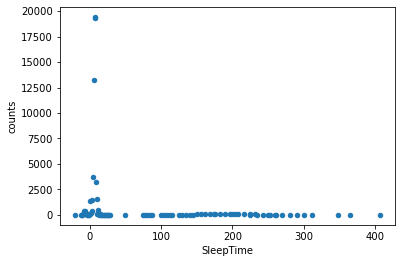

In [15]:
# Revisamos los valores de la variable numérica: SleepTime
df_responses['SleepTime'].value_counts().rename_axis('SleepTime').reset_index(name='counts').plot.scatter(x='SleepTime', y='counts')

Con este diagrama de dispersion se puede observar que hay valores menores a 0 y mayores que 24 para las horas diarias de sueño de una persona, lo cual claramente no tiene sentido. No obstante, el diagrama también nos permite observar que no se repiten mucho estos valores, es decir, hay errores pero por suerte no son muchos.

In [16]:
# Calculamos la cantidad de registros con valores menores o iguales a 0, o mayores o iguales a 24
df_responses[df_responses['SleepTime'] <= 0]['SleepTime'].value_counts().sum() + df_responses[df_responses['SleepTime'] >= 24]['SleepTime'].value_counts().sum()

4044

Con lo anterior descubrimos que hay exactamente 4044 registros con valores de SleepTime NO válidos

#### Cadenas de caracteres numericas

En la variable BMI, solo debería existir valores numericos mayores a 1 y menores que 99, sin embargo, existen registros cuyo BMI contiene caracteres además de números, un error a corregir.

In [17]:
# Retiramos esos "errores"
dfa = df_responses
dfa = dfa[np.isfinite(pd.to_numeric(dfa.BMI, errors="coerce"))]
# Transformamos los valores a numericos
dfa['BMI']=dfa['BMI'].astype(float)

In [18]:
# Calculamos la cantidad de registros con valores menores o iguales a 1, o mayores o iguales a 99
dfa[dfa['BMI'] <= 1]['BMI'].value_counts().sum() + dfa[dfa['BMI'] >= 99]['BMI'].value_counts().sum()

1370

Con lo anterior descubrimos que hay exactamente 1370 registros con valores de BMI NO válidos

En la variable PhysicalHealth, solo debería existir valores numericos mayores o iguales a 0 y menores o iguales que 30, sin embargo, existen registros cuyo PhysicalHealth contiene caracteres además de números, un error a corregir.

In [19]:
# Retiramos esos "errores"
dfa = df_responses
dfa = dfa[np.isfinite(pd.to_numeric(dfa.PhysicalHealth, errors="coerce"))]
# Transformamos los valores a numericos
dfa['PhysicalHealth']=dfa['PhysicalHealth'].astype(float)

In [20]:
# Calculamos la cantidad de registros con valores menores a 0, o mayores a 30
dfa[dfa['PhysicalHealth'] < 0]['PhysicalHealth'].value_counts().sum() + dfa[dfa['PhysicalHealth'] > 30]['PhysicalHealth'].value_counts().sum()

785

Con lo anterior descubrimos que hay exactamente 785 registros con valores de PhysicalHealth NO válidos

En la variable MentalHealth, solo debería existir valores numericos mayores o iguales a 0 y menores o iguales que 30, sin embargo, existen registros cuyo MentalHealth contiene caracteres además de números, un error a corregir.

In [21]:
# Retiramos esos "errores"
dfa = df_responses
dfa = dfa[np.isfinite(pd.to_numeric(dfa.MentalHealth, errors="coerce"))]
# Transformamos los valores a numericos
dfa['MentalHealth']=dfa['MentalHealth'].astype(float)

In [22]:
# Calculamos la cantidad de registros con valores menores a 0, o mayores a 30
dfa[dfa['MentalHealth'] < 0]['MentalHealth'].value_counts().sum() + dfa[dfa['MentalHealth'] > 30]['MentalHealth'].value_counts().sum()

951

Con lo anterior descubrimos que hay exactamente 951 registros con valores de MentalHealth NO válidos

## Tareas de transformación

Podemos empezar eliminando los duplicados que encontramos en la seccion anterior

In [23]:
df_responses.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
Index,,,,,,,,,,,,,,,,,,
0,26.5,No,No,No,0.0,0.0,No,Male,64-60,White,No,Yes,Very good,8.0,No,No,No,No
1,28.75,ýNoÚ,No,No,0.0,2.0,No,Male,59-55,White,No,Yes,Very good,7.0,No,No,No,No
2,19.9,Yes,No,No,0.0,1.0,No,Male,39-35,White,No,Yes,Good,7.0,No,No,No,No
3,28.06,No,No,No,1.0,1.0,No,Female,69-65,White,Yes,Yes,Good,8.0,No,No,No,£NoÇ
4,29.29,Yes,No,No,0.0,1.0,No,Female,74-70,White,No,Yes,Very good,7.0,Yes,No,No,No


In [24]:
df_responses['SkinCancer'].value_counts()

No     61160
Yes     6340
Name: SkinCancer, dtype: int64

In [25]:
df_responses['SkinCancer'].isnull().sum()

0

| COLUMNAS | CONSISTENCIA | VALIDEZ | COMPLETITUD |
| -------- | ------------ | ------- | ----------- |
| BMI | Separar caracteres de los números | Eliminar atipicos y corregir con promedio | Llenar nulos con promedio |
| Sex | Limpiar categorias de otros caracteres | Eliminar caracteres aleatorios | Llenar nulos con probabilidad de ocurrencia (?)|
| AgeCategory | NA | (?) | NA |
| Race | Limpiar categorias de otros caracteres | Eliminar caracteres aleatorios | Llenar nulos con probabilidad de ocurrencia (?) |
| Smoking  | Limpiar categorias de otros caracteres | Eliminar caracteres aleatorios | Llenar nulos con probabilidad de ocurrencia (?) |
| AlcoholDrinking | NA | NA | NA |
| PhysicalActivity | NA | NA | NA |
| SleepTime | NA | Eliminar atipicos y corregir con promedio | NA |
| **HeartDisease** | **Limpiar categorias de otros caracteres** | **NA** | **Eliminar registros nulos** |
| Stroke | Limpiar categorias de otros caracteres | Eliminar caracteres aleatorios | Llenar nulos con la moda |
| PhysicalHealth | Separar caracteres de los números | Eliminar atipicos y corregir con promedio | NA |
| MentalHealth | Separar caracteres de los números | Eliminar atipicos y corregir con promedio | NA |
| DiffWalking | NA | NA | NA |
| Diabetic | Limpiar categorias de otros caracteres | Eliminar caracteres aleatorios | Llenar nulos con probabilidad de ocurrencia (?)|
| GenHealth | Limpiar categorias de otros caracteres | Eliminar caracteres aleatorios | Llenar nulos con probabilidad de ocurrencia (?)|
| Asthma | NA | NA | NA |
| KidneyDisease | NA | NA | NA |
| SkinCancer | NA | NA | NA |

## Preprocesamiento de los datos

In [26]:
# Separamos los datos para hacer limpieza y preparacion
df_resp_t = df_responses
# Eliminamos duplicados
df_resp_t = df_resp_t.drop_duplicates()
# Cantidad de datos y número de variables
df_resp_t.shape

(67170, 18)

In [27]:
# Eliminamos los registros que tengan la variable objetivo nula (no serán útiles)
df_resp_t = df_resp_t.dropna(subset=['HeartDisease'])
# Cantidad de datos y número de variables
df_resp_t.shape

(61545, 18)

##### Separar caracteres de los números: BMI, PhysicalHealth, MentalHealth

In [28]:
# Separar caracteres de los números: BMI, PhysicalHealth, MentalHealth
df_resp_t['BMI'] = df_resp_t['BMI'].str.extract('(\d+)', expand=False)
df_resp_t['PhysicalHealth'] = df_resp_t['PhysicalHealth'].str.extract('(\d+)', expand=False)
df_resp_t['MentalHealth'] = df_resp_t['MentalHealth'].str.extract('(\d+)', expand=False)
# Transformar a numeros los datos
df_resp_t['BMI'] = df_resp_t['BMI'].astype(float)
df_resp_t['PhysicalHealth'] = df_resp_t['PhysicalHealth'].astype(float)
df_resp_t['MentalHealth'] = df_resp_t['MentalHealth'].astype(float)

##### Eliminar atipicos y corregir con promedio: BMI, SleepTime, PhysicalHealth, MentalHealth

In [29]:
# Volver nulos valores atipicos: BMI <= 1 and BMI >= 99
df_resp_t['BMI'] = df_resp_t['BMI'].mask(df_resp_t['BMI'] <= 1)
df_resp_t['BMI'] = df_resp_t['BMI'].mask(df_resp_t['BMI'] >= 99)
# Volver nulos valores atipicos: SleepTime <= 0 and SleepTime > 24
df_resp_t['SleepTime'] = df_resp_t['SleepTime'].mask(df_resp_t['SleepTime'] <= 0)
df_resp_t['SleepTime'] = df_resp_t['SleepTime'].mask(df_resp_t['SleepTime'] > 24)
# Volver nulos valores atipicos: PhysicalHealth < 0 and PhysicalHealth > 30
df_resp_t['PhysicalHealth'] = df_resp_t['PhysicalHealth'].mask(df_resp_t['PhysicalHealth'] < 0)
df_resp_t['PhysicalHealth'] = df_resp_t['PhysicalHealth'].mask(df_resp_t['PhysicalHealth'] > 30)
# Volver nulos valores atipicos: MentalHealth < 0 and MentalHealth > 30
df_resp_t['MentalHealth'] = df_resp_t['MentalHealth'].mask(df_resp_t['MentalHealth'] < 0)
df_resp_t['MentalHealth'] = df_resp_t['MentalHealth'].mask(df_resp_t['MentalHealth'] > 30)
# Llenar nulos con promedio
mean_bmi = df_resp_t['BMI'].mean()
mean_st = df_resp_t['SleepTime'].mean()
mean_ph = df_resp_t['PhysicalHealth'].mean()
mean_mh = df_resp_t['MentalHealth'].mean()

df_resp_t['BMI'].fillna(value=mean_bmi, inplace = True)
df_resp_t['SleepTime'].fillna(value=mean_st, inplace = True)
df_resp_t['PhysicalHealth'].fillna(value=mean_ph, inplace = True)
df_resp_t['MentalHealth'].fillna(value=mean_mh, inplace = True)

##### Limpiar categorias de otros caracteres: Sex, Race, Smoking, HeartDisease, Stroke, Diabetic, GenHealth

Cambios para Sex

In [30]:
# Se limpian las categorias que están bien pero tienen caracteres extras que la "ensucian". Ejemplo: ØFemaleÓ
sexes = ['F', 'M']
for sex in sexes:
    df_resp_t.loc[df_resp_t['Sex'].str.contains(sex, na=False, flags=re.IGNORECASE), 'Sex'] = sex
# Volver nulos aquellos valores que no pertenencen a ninguna categoria valida
df_resp_t['Sex'] = df_resp_t['Sex'].mask(~df_resp_t['Sex'].isin(sexes))
# Reemplazar los nulos
nullSex = df_resp_t['Sex'].isnull().values
u, c = np.unique(df_resp_t['Sex'].values[~nullSex], return_counts=1)
df_resp_t.loc[df_resp_t['Sex'].isnull(), 'Sex'] = np.random.choice(u, nullSex.sum(), p=c / c.sum())
# Cambiar de F a Female y de M a Male
df_resp_t['Sex'].replace('F','Female', inplace=True)
df_resp_t['Sex'].replace('M','Male', inplace=True)

In [31]:
df_resp_t['Sex'].value_counts()

Female    32469
Male      29076
Name: Sex, dtype: int64

Cambios para Race

In [32]:
# Reemplazamos nulos para hacer el paso siguente
df_resp_t['Race'].fillna(value='inv', inplace = True)
# Se limpian las categorias que están bien pero tienen caracteres extras que la "ensucian". Ejemplo: ØAsianÓ
races = ['Asian', 'Black', 'Hispanic', 'Other', 'White']
for race in races:
    df_resp_t.loc[df_resp_t['Race'].str.contains(race, na=False, flags=re.IGNORECASE), 'Race'] = race
# Volver nulos aquellos valores que no pertenencen a ninguna categoria valida
df_resp_t['Race'] = df_resp_t['Race'].mask(~df_resp_t['Race'].isin(races))
# Reemplazar los nulos
nullRace = df_resp_t['Race'].isnull().values
u, c = np.unique(df_resp_t['Race'].values[~nullRace], return_counts=1)
df_resp_t.loc[df_resp_t['Race'].isnull(), 'Race'] = np.random.choice(u, nullRace.sum(), p=c / c.sum())

In [33]:
df_resp_t['Race'].value_counts()

White       48061
Hispanic     5210
Black        4539
Other        2122
Asian        1613
Name: Race, dtype: int64

Cambios para Smoking

In [34]:
# Se limpian las categorias que están bien pero tienen caracteres extras que la "ensucian". Ejemplo: ØYesÓ
options = ['Yes', 'No']
for option in options:
    df_resp_t.loc[df_resp_t['Smoking'].str.contains(option, na=False, flags=re.IGNORECASE), 'Smoking'] = option
# Volver nulos aquellos valores que no pertenencen a ninguna categoria valida
df_resp_t['Smoking'] = df_resp_t['Smoking'].mask(~df_resp_t['Smoking'].isin(options))
# Reemplazar los nulos
nullSmoking = df_resp_t['Smoking'].isnull().values
u, c = np.unique(df_resp_t['Smoking'].values[~nullSmoking], return_counts=1)
df_resp_t.loc[df_resp_t['Smoking'].isnull(), 'Smoking'] = np.random.choice(u, nullSmoking.sum(), p=c / c.sum())

In [35]:
df_resp_t['Smoking'].value_counts()

No     36052
Yes    25493
Name: Smoking, dtype: int64

Cambios para Stroke

In [36]:
# Se limpian las categorias que están bien pero tienen caracteres extras que la "ensucian". Ejemplo: ØYesÓ
options = ['Yes', 'No']
for option in options:
    df_resp_t.loc[df_resp_t['Stroke'].str.contains(option, na=False, flags=re.IGNORECASE), 'Stroke'] = option
# Volver nulos aquellos valores que no pertenencen a ninguna categoria valida
df_resp_t['Stroke'] = df_resp_t['Stroke'].mask(~df_resp_t['Stroke'].isin(options))
# Reemplazar los nulos con la moda
df_resp_t['Stroke'].fillna(value=df_resp_t['Stroke'].mode()[0], inplace=True)

In [37]:
df_resp_t['Stroke'].value_counts()

No     59302
Yes     2243
Name: Stroke, dtype: int64

Cambios para Diabetic

In [38]:
doptions = ['pregnancy', 'borderline', 'Yes', 'No']
# Se limpian las categorias que están bien pero tienen caracteres extras que la "ensucian". Ejemplo: ØYesÓ
for doption in doptions:
    df_resp_t.loc[df_resp_t['Diabetic'].str.replace(" ","").str.contains(doption.replace(" ",""), na=False, flags=re.IGNORECASE), 'Diabetic'] = doption
# Volver nulos aquellos valores que no pertenencen a ninguna categoria valida
df_resp_t['Diabetic'] = df_resp_t['Diabetic'].mask(~df_resp_t['Diabetic'].isin(doptions))
# Reemplazar los nulos
nullDiabetic = df_resp_t['Diabetic'].isnull().values
u, c = np.unique(df_resp_t['Diabetic'].values[~nullDiabetic], return_counts=1)
df_resp_t.loc[df_resp_t['Diabetic'].isnull(), 'Diabetic'] = np.random.choice(u, nullDiabetic.sum(), p=c / c.sum())
# Cambiar de borderline a No, borderline diabetes y de pregnancy a Yes (during pregnancy)
df_resp_t['Diabetic'].replace('borderline','No, borderline diabetes', inplace=True)
df_resp_t['Diabetic'].replace('pregnancy','Yes (during pregnancy)', inplace=True)

In [39]:
df_resp_t['Diabetic'].value_counts()

No                         51933
Yes                         7801
No, borderline diabetes     1325
Yes (during pregnancy)       486
Name: Diabetic, dtype: int64

Cambios para GenHealth

In [40]:
ghoptions = ['VeryG','Good','Excellent','Fair','Poor']
# Se limpian las categorias que están bien pero tienen caracteres extras que la "ensucian". Ejemplo: ØPoorÓ
for ghoption in ghoptions:
    df_resp_t.loc[df_resp_t['GenHealth'].str.replace(" ","").str.contains(ghoption.replace(" ",""), na=False, flags=re.IGNORECASE), 'GenHealth'] = ghoption
# Volver nulos aquellos valores que no pertenencen a ninguna categoria valida
df_resp_t['GenHealth'] = df_resp_t['GenHealth'].mask(~df_resp_t['GenHealth'].isin(ghoptions))
# Reemplazar los nulos
nullGHealth = df_resp_t['GenHealth'].isnull().values
u, c = np.unique(df_resp_t['GenHealth'].values[~nullGHealth], return_counts=1)
df_resp_t.loc[df_resp_t['GenHealth'].isnull(), 'GenHealth'] = np.random.choice(u, nullGHealth.sum(), p=c / c.sum())
# Cambiar de VeryG a Very good
df_resp_t['GenHealth'].replace('VeryG','Very good', inplace=True)

In [41]:
df_resp_t['GenHealth'].value_counts()

Very good    21769
Good         18036
Excellent    12800
Fair          6739
Poor          2201
Name: GenHealth, dtype: int64

Cambios para HeartDisease

In [42]:
# Se limpian las categorias que están bien pero tienen caracteres extras que la "ensucian". Ejemplo: £Yesï
options = ['Yes', 'No']
for option in options:
    df_resp_t.loc[df_resp_t['HeartDisease'].str.contains(option, na=False, flags=re.IGNORECASE), 'HeartDisease'] = option

In [43]:
df_resp_t['HeartDisease'].value_counts()

No     56222
Yes     5323
Name: HeartDisease, dtype: int64

## Resultados preparados

In [44]:
df_resp_t.shape

(61545, 18)

In [45]:
df_resp_t.dtypes

BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
HeartDisease         object
dtype: object

In [46]:
def yesno (col,row):
    val = row[col]
    if val == 'Yes' :
        return 1
    return 0


df_resp_t['Smoking']=df_resp_t.apply (lambda row: yesno('Smoking',row), axis=1)  
df_resp_t['AlcoholDrinking']=df_resp_t.apply (lambda row: yesno('AlcoholDrinking',row), axis=1)  
df_resp_t['Stroke']=df_resp_t.apply (lambda row: yesno('Stroke',row), axis=1)  
df_resp_t['DiffWalking']=df_resp_t.apply (lambda row: yesno('DiffWalking',row), axis=1)  
df_resp_t['PhysicalActivity']=df_resp_t.apply (lambda row: yesno('PhysicalActivity',row), axis=1)  

df_resp_t['Asthma']=df_resp_t.apply (lambda row: yesno('Asthma',row), axis=1)  
df_resp_t['KidneyDisease']=df_resp_t.apply (lambda row: yesno('KidneyDisease',row), axis=1)  
df_resp_t['SkinCancer']=df_resp_t.apply (lambda row: yesno('SkinCancer',row), axis=1)  
df_resp_t['HeartDisease']=df_resp_t.apply (lambda row: yesno('HeartDisease',row), axis=1)  


df_resp_l = df_resp_t.copy()
le = preprocessing.LabelEncoder()
df_resp_t['Race']= le.fit_transform(df_resp_l['Race'])
df_resp_t['Sex']= le.fit_transform(df_resp_l['Sex'])
df_resp_t['GenHealth']=le.fit_transform(df_resp_l['GenHealth'])
df_resp_t['AgeCategory'] = le.fit_transform(df_resp_l['AgeCategory'])
df_resp_t['Diabetic'] = le.fit_transform(df_resp_l['Diabetic'])

In [47]:
df_resp_t.head(5)

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
Index,,,,,,,,,,,,,,,,,,
0,26.0,0,0,0,0.0,0.0,0,1,8,4,0,1,4,8.0,0,0,0,0
1,28.0,0,0,0,0.0,2.0,0,1,7,4,0,1,4,7.0,0,0,0,0
2,19.0,1,0,0,0.0,1.0,0,1,3,4,0,1,2,7.0,0,0,0,0
3,28.0,0,0,0,1.0,1.0,0,0,9,4,2,1,2,8.0,0,0,0,0
4,29.0,1,0,0,0.0,1.0,0,0,10,4,0,1,4,7.0,1,0,0,0


In [48]:
df_resp_t.sample(5)

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
Index,,,,,,,,,,,,,,,,,,
35836,27.0,1,0,0,21.000000,0.0,0,0,4,2,0,0,0,4.0,0,0,0,0
62368,29.0,1,0,0,20.000000,0.0,0,1,10,4,2,0,1,8.0,0,0,0,1
10349,33.0,0,0,1,0.000000,0.0,1,1,9,4,0,1,2,8.0,0,0,0,1
10916,33.0,0,0,0,3.350432,2.0,0,1,8,4,1,1,2,10.0,0,1,0,1
34273,26.0,1,0,0,0.000000,7.0,0,0,7,4,0,1,4,6.0,1,0,1,0


In [49]:
df_resp_t.tail(5)

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
Index,,,,,,,,,,,,,,,,,,
67494,30.000000,1,0,0,0.0,0.0,0,1,2,4,0,1,2,8.0,0,0,0,0
67495,26.000000,0,0,0,14.0,14.0,0,0,10,4,0,1,1,8.0,0,0,1,0
67496,27.819745,1,0,0,30.0,0.0,0,0,11,4,0,0,1,7.0,0,0,0,0
67497,27.000000,0,0,0,0.0,2.0,1,0,8,4,0,0,2,7.0,0,0,0,0
67499,24.000000,0,0,0,0.0,0.0,0,0,2,3,0,1,4,8.0,0,0,0,0


In [50]:
x = df_resp_t.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]].values
print(x )

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [51]:
y = df_resp_t.iloc[:, 17].values
y = y.astype('int')

In [52]:
# Conjunto de entrnamiento

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.75, random_state = 0 )

In [53]:
# Estandarizar las escalas 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [54]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()

In [55]:
classifier.fit(x_train, y_train)

GaussianNB()

In [56]:
y_pred = classifier.predict(x_test)

In [57]:
print(y_pred)

[0 1 0 ... 0 0 0]


In [58]:
cm = confusion_matrix(y_test, y_pred)
print (cm)

[[37209  4968]
 [ 2180  1802]]


/Users/zadiaz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


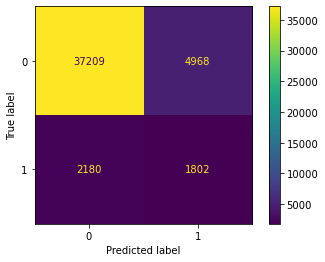

In [59]:
plot_confusion_matrix(classifier,  x_test, y_test)  
plt.show()  

In [60]:
 print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91     42177
           1       0.27      0.45      0.34      3982

    accuracy                           0.85     46159
   macro avg       0.61      0.67      0.62     46159
weighted avg       0.89      0.85      0.86     46159



In [61]:
y_pred_train = classifier.predict(x_train)
y_pred_test = classifier.predict(x_test)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.85
Exactitud sobre test: 0.85
